# Load and Explore the Dataset

In [16]:
import pandas as pd

df = pd.read_csv("INvideos.csv")
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


# Clean and Prepare the Data

In [18]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_hour'] = df['publish_time'].dt.hour

## View the first few rows (including new column)

In [22]:
print(df[['publish_time', 'publish_hour']].head())

               publish_time  publish_hour
0 2017-11-12 12:20:39+00:00            12
1 2017-11-13 05:43:56+00:00             5
2 2017-11-12 15:48:08+00:00            15
3 2017-11-12 07:08:48+00:00             7
4 2017-11-13 01:14:16+00:00             1


## Check value counts of hours (summary)

In [24]:
print(df['publish_hour'].value_counts().sort_index())

publish_hour
0      400
1      585
2      978
3     1330
4     1960
5     2184
6     2323
7     2119
8     2051
9     1863
10    2058
11    2295
12    2782
13    2631
14    2838
15    2130
16    2134
17    1587
18     849
19     524
20     335
21     359
22     531
23     506
Name: count, dtype: int64


## Print entire columns (only if data is small)

In [26]:
print(df['publish_hour'])

0        12
1         5
2        15
3         7
4         1
         ..
37347     8
37348    11
37349     5
37350    15
37351     4
Name: publish_hour, Length: 37352, dtype: int32


# Exploratory Data Analysis (EDA)

C:\Users\admin\AppData\Local\Temp\ipykernel_3684\4172040430.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_views.index, y=category_views.values, palette="Blues_d")


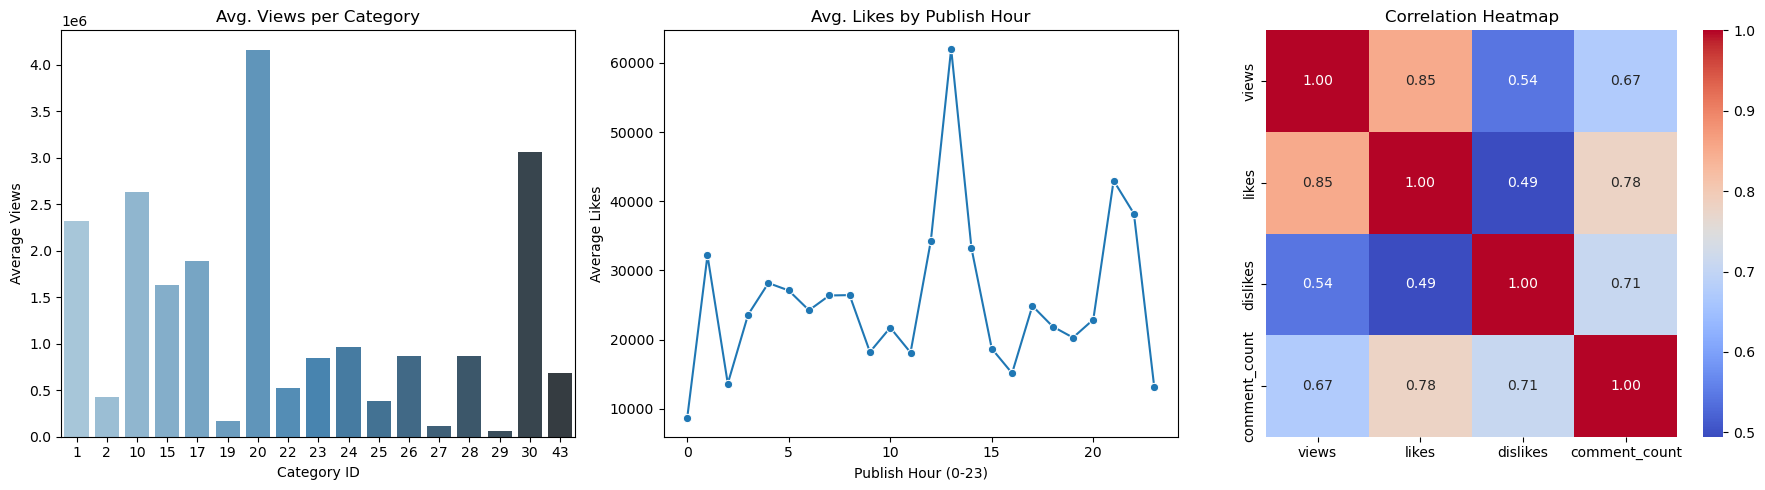

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary datetime and numeric columns
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_hour'] = df['publish_time'].dt.hour

# Create a 1x3 grid of plots
plt.figure(figsize=(18, 5))

# ----------------- 1. Bar Chart: Category vs Avg. Views -----------------
plt.subplot(1, 3, 1)
category_views = df.groupby('category_id')['views'].mean().sort_values(ascending=False)
sns.barplot(x=category_views.index, y=category_views.values, palette="Blues_d")
plt.title('Avg. Views per Category')
plt.xlabel('Category ID')
plt.ylabel('Average Views')

# ----------------- 2. Line Plot: Publish Hour vs Avg. Likes -----------------
plt.subplot(1, 3, 2)
hour_likes = df.groupby('publish_hour')['likes'].mean()
sns.lineplot(x=hour_likes.index, y=hour_likes.values, marker='o')
plt.title('Avg. Likes by Publish Hour')
plt.xlabel('Publish Hour (0-23)')
plt.ylabel('Average Likes')

# ----------------- 3. Heatmap: Correlation -----------------
plt.subplot(1, 3, 3)
corr = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Show all plots
plt.tight_layout()
plt.show()


# Feature Engineering

In [30]:
df['engagement'] = df['likes'] + df['comment_count'] - df['dislikes']
df['title_length'] = df['title'].apply(len)

#### This will show the video title along with its engagement and title length for the first 5 rows.



In [32]:
print(df[['title', 'engagement', 'title_length']].head())


                                               title  engagement  title_length
0  Sharry Mann: Cute Munda ( Song Teaser) | Parmi...       34050            81
1  पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...        -169            58
2  Stylish Star Allu Arjun @ ChaySam Wedding Rece...        1917            58
3                     Eruma Saani | Tamil vs English       71413            30
4  why Samantha became EMOTIONAL @ Samantha naga ...         265            88


## Descriptive statistics

In [34]:
print(df[['engagement', 'title_length']].describe())


         engagement  title_length
count  3.735200e+04  37352.000000
mean   2.809463e+04     70.563370
std    1.014305e+05     22.405722
min   -1.907100e+04      5.000000
25%    7.880000e+02     53.000000
50%    3.010000e+03     74.000000
75%    1.394700e+04     91.000000
max    2.901634e+06    100.000000


In [36]:
print(df[['title', 'engagement']].sort_values(by='engagement', ascending=False).head(10))

                                                  title  engagement
4477  Marvel Studios' Avengers: Infinity War Officia...     2901634
4236  Marvel Studios' Avengers: Infinity War Officia...     2874069
4013  Marvel Studios' Avengers: Infinity War Officia...     2844111
3823  Marvel Studios' Avengers: Infinity War Officia...     2799852
3639  Marvel Studios' Avengers: Infinity War Officia...     2729494
3456  Marvel Studios' Avengers: Infinity War Officia...     2606383
3256  Marvel Studios' Avengers: Infinity War Officia...     2426834
5408  YouTube Rewind: The Shape of 2017 | #YouTubeRe...     2175251
5119  YouTube Rewind: The Shape of 2017 | #YouTubeRe...     2128003
4936  YouTube Rewind: The Shape of 2017 | #YouTubeRe...     1985912


## Histogram or visualization

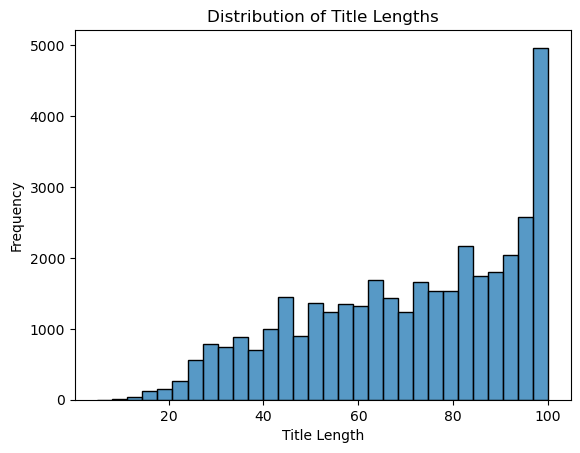

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['title_length'], bins=30)
plt.title("Distribution of Title Lengths")
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.show()

# Build Content-Based Recommendation System

###  Text Vectorization (TF-IDF)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['title'])

## Cosine Similarity

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf.fit_transform(df['title'])

# Use NearestNeighbors to get top N similar items (much more memory-efficient)
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(tfidf_matrix)

# Example: Get top 5 similar videos to video index 0
distances, indices = nn.kneighbors(tfidf_matrix[0], n_neighbors=6)  # 6 because first is itself
similar_video_indices = indices[0][1:]  # skip the first (itself)

print("Video:", df.iloc[0]['title'])
print("\nRecommended:")
for idx in similar_video_indices:
    print("-", df.iloc[idx]['title'])


Video: Sharry Mann: Cute Munda ( Song Teaser) | Parmish Verma | Releasing on 17 November

Recommended:
- Sharry Mann: Cute Munda ( Song Teaser) | Parmish Verma | Releasing on 17 November
- Sharry Mann: Cute Munda ( Song Teaser) | Parmish Verma | Releasing on 17 November
- Cute Munda - Sharry Mann (Full Video Song) | Parmish Verma | Punjabi Songs 2017 | Lokdhun Punjabi
- Cute Munda - Sharry Mann (Full Video Song) | Parmish Verma | Punjabi Songs 2017 | Lokdhun Punjabi
- Cute Munda - Sharry Mann (Full Video Song) | Parmish Verma | Punjabi Songs 2017 | Lokdhun Punjabi


##  Recommendation Function

In [45]:
def recommend(title, n=5):
    title = title.strip().lower()
    
    # Match title case-insensitively
    match = df[df['title'].str.lower() == title]
    
    if match.empty:
        return "❌ Title not found in dataset. Please check for typos or case."

    idx = match.index[0]
    
    # Get n+1 neighbors (including itself)
    distances, indices = nn.kneighbors(tfidf_matrix[idx], n_neighbors=n+1)
    
    # Exclude the input title itself
    recommended_indices = indices[0][1:]
    
    print(f"🎬 Input Video: {df.iloc[idx]['title']}\n")
    print("📋 Recommended Videos:")
    for i in recommended_indices:
        print(f"• {df.iloc[i]['title']}")


In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from difflib import get_close_matches

# -------------------------------
# Load Data
# -------------------------------
df = pd.read_csv("INvideos.csv")
df['title'] = df['title'].fillna("").astype(str)
df.drop_duplicates(subset='title', inplace=True)

# -------------------------------
# TF-IDF Vectorization
# -------------------------------
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf.fit_transform(df['title'])

# -------------------------------
# Fit Nearest Neighbors Model
# -------------------------------
nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(tfidf_matrix)

# -------------------------------
# Fuzzy-Matching Based Recommend Function
# -------------------------------
def recommend(title_input, n=5):
    # Fuzzy match the title
    all_titles = df['title'].tolist()
    matches = get_close_matches(title_input, all_titles, n=1, cutoff=0.4)

    if not matches:
        print("❌ Title not found. Try a different keyword or correct spelling.")
        return

    matched_title = matches[0]
    idx = df[df['title'] == matched_title].index[0]

    # Find similar videos
    distances, indices = nn.kneighbors(tfidf_matrix[idx], n_neighbors=n+1)
    recommended_indices = indices[0][1:]

    print(f"\n🎬 Input Title Match: {matched_title}\n")
    print("📋 Recommended Videos:")
    for i in recommended_indices:
        print(f"• {df.iloc[i]['title']}")


# -------------------------------
# Interactive CLI
# -------------------------------
if __name__ == "__main__":
    print("🎥 YouTube Video Recommender (India) 🇮🇳")
    print("--------------------------------------")

    while True:
        user_input = input("\nEnter a video title (or 'exit' to quit): ")
        if user_input.lower() in ['exit', 'quit']:
            print("👋 Exiting recommender. Goodbye!")
            break

        recommend(user_input)


🎥 YouTube Video Recommender (India) 🇮🇳
--------------------------------------



Enter a video title (or 'exit' to quit):  harry Mann: Cute Munda ( Song Teaser) | Parmish Verma | Releasing on 17 November



🎬 Input Title Match: Sharry Mann: Cute Munda ( Song Teaser) | Parmish Verma | Releasing on 17 November

📋 Recommended Videos:
• Cute Munda - Sharry Mann (Full Video Song) | Parmish Verma | Punjabi Songs 2017 | Lokdhun Punjabi
• Sharry Mann: Love You ( Teaser) | Parmish Verma | Mistabaaz | Full Song Releasing on 30th December
• Sharry Mann: Love You ( Audio Song) | Parmish Verma | Mista Baaz | Releasing on 30 December
• Sharry Mann- Love You (Official Song) | Parmish Verma | Latest Punjabi Song 2018 | Lokdhun
• Sharry Mann- Love You (Full Video Song) | Parmish Verma | Mista Baaz | Punjabi Songs 2018 | Lokdhun



Enter a video title (or 'exit' to quit):  ute Munda - Sharry Mann (Full Video Song) | Parmish Verma | Punjabi Songs 2017 | Lokdhun Punjabi



🎬 Input Title Match: Cute Munda - Sharry Mann (Full Video Song) | Parmish Verma | Punjabi Songs 2017 | Lokdhun Punjabi

📋 Recommended Videos:
• TIME IS MONEY | RishhSome
• 13 Reasons Why: Season 2 | Official Trailer [HD] | Netflix
• OnePlus 6 Review: Right On the Money!
• 13 Reasons Why: Season 2 | Date Announcement [HD] | Netflix
• BLACK MONEY | Watch Till The End



Enter a video title (or 'exit' to quit):  BLACK MONEY | Watch Till The End



🎬 Input Title Match: BLACK MONEY | Watch Till The End

📋 Recommended Videos:
• Solvathellam Unmai Season 2 - Episode 438 - December 07, 2017 - Shorts
• Comedy Khiladigalu Season 2 - Episode 4 - January 07, 2018 - Best Scene
• Comedy Khiladigalu Season 2 - Episode 1 - December 30, 2017 - Best Scene
• Comedy Khiladigalu Season 2 - Episode 2 - December 31, 2017 - Best Scene
• Sembarathi - Episode 145 - May 07, 2018 - Best Scene



Enter a video title (or 'exit' to quit):  exit


👋 Exiting recommender. Goodbye!


# Analyze and Rank Recommendations by Engagement

In [58]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from difflib import get_close_matches

# -------------------------------
# Load & Preprocess Data
# -------------------------------
df = pd.read_csv("INvideos.csv")
df['title'] = df['title'].fillna("").astype(str)
df.drop_duplicates(subset='title', inplace=True)

# Create engagement score for ranking later
df['engagement'] = df['likes'] + df['comment_count'] - df['dislikes']

# -------------------------------
# TF-IDF Vectorization & Model Training
# -------------------------------
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf.fit_transform(df['title'])

nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(tfidf_matrix)

# -------------------------------
# Recommendation Function
# -------------------------------
def recommend(title_input, n=5):
    all_titles = df['title'].tolist()
    matches = get_close_matches(title_input, all_titles, n=1, cutoff=0.4)

    if not matches:
        print("❌ Title not found. Try a different keyword or correct spelling.")
        return None, []

    matched_title = matches[0]
    idx = df[df['title'] == matched_title].index[0]

    distances, indices = nn.kneighbors(tfidf_matrix[idx], n_neighbors=n+1)
    # Exclude the input itself and ensure indices are valid
    recommended_indices = [i for i in indices[0] if i != idx and i < len(df)]

    return matched_title, recommended_indices

# -------------------------------
# Rank Recommendations by Engagement
# -------------------------------
def get_ranked_recommendations(title, n=5):
    matched_title, recommended_indices = recommend(title, n)

    if not recommended_indices:
        print("❌ No recommendations found.")
        return

    recommended_df = df.iloc[recommended_indices].copy()
    ranked_df = recommended_df.sort_values(by='engagement', ascending=False)

    print(f"\n🎬 Recommendations for: {matched_title}")
    print(ranked_df[['title', 'engagement']].head(n).to_string(index=False))

# -------------------------------
# Interactive Command Line Interface
# -------------------------------
if __name__ == "__main__":
    print("🎥 Indian YouTube Video Recommender System 🇮🇳")
    print("------------------------------------------------")

    while True:
        user_input = input("\nEnter a video title (or type 'exit' to quit): ").strip()
        if user_input.lower() in ['exit', 'quit']:
            print("👋 Goodbye!")
            break
        get_ranked_recommendations(user_input, n=5)


🎥 Indian YouTube Video Recommender System 🇮🇳
------------------------------------------------



Enter a video title (or type 'exit' to quit):  Solvathellam Unmai Season 2 - Episode 438



🎬 Recommendations for: Solvathellam Unmai Season 2 - Episode 438 - December 07, 2017 - Shorts
                                                                                             title  engagement
                                                         Mass Bunking Ft Bakkbenchers | MostlySane       43451
           REAL REASON why Thala didn't go to Natchathira Kalai Vizha 2018 | Hot Tamil Cinema News        4880
நட்சத்திர விழாவை அதிர வைத்த விஜய் மற்றும் அஜித்  ajith and vijay  function  Natchathira Vizha 2018        1453
                    Rajini and Kamal Mass Entry in Malaysia | Natchathira Vizha 2018 | Latest News        1342
            Ajith would've NEVER said that about Natchathira Kalai Vizha : Mansoor Ali Khan Speech        1034



Enter a video title (or type 'exit' to quit):  Ajith would've NEVER said that about Natchathira Kalai Vizha : Mansoor Ali Khan Speech



🎬 Recommendations for: Ajith would've NEVER said that about Natchathira Kalai Vizha : Mansoor Ali Khan Speech
                                                                                              title  engagement
                      அஸ்வினியின் கடைசி நிமிடங்களில் நடந்தது என்ன தெரியுமா ? உறையவைக்கும் காரணங்கள்        1060
நடிகை ஸ்ரீதேவிக்கு துபாயில் உண்மையில் என்ன நடந்தது ? Sridevi last minutes in Dubai, Actress Sridevi         348
                            ஸ்ரீதேவி துடிதுடித்த கடைசி நிமிடங்கள்-உண்மையில் என்ன நடந்தது தெரியுமா ?         300
                        ஜெ துடிதுடித்த கடைசிநிமிடங்கள்- சசிகலா நேரடி வாக்குமூலத்தில் வெளிவந்த உண்மை         266
                                              Breaking News IT Raid - நடந்தது என்ன? சிக்கியது என்ன?          10



Enter a video title (or type 'exit' to quit):  exit


👋 Goodbye!


## Evaluation Metrics

In [64]:
def precision_at_k(recommended, relevant, k):
    recommended_k = recommended[:k]
    relevant_set = set(relevant)
    hits = sum(1 for item in recommended_k if item in relevant_set)
    return hits / k

def recall_at_k(recommended, relevant, k):
    recommended_k = recommended[:k]
    relevant_set = set(relevant)
    hits = sum(1 for item in recommended_k if item in relevant_set)
    return hits / len(relevant_set) if relevant_set else 0

def f1_at_k(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0


In [66]:
recommended_videos = ['vid1', 'vid2', 'vid3', 'vid4', 'vid5']
relevant_videos = ['vid3', 'vid4', 'vid6']

precision = precision_at_k(recommended_videos, relevant_videos, 5)
recall = recall_at_k(recommended_videos, relevant_videos, 5)
f1 = f1_at_k(precision, recall)

print(f'Precision@5: {precision:.2f}')
print(f'Recall@5: {recall:.2f}')
print(f'F1@5: {f1:.2f}')


Precision@5: 0.40
Recall@5: 0.67
F1@5: 0.50


## Interpreting the Metrics
Precision@K: High precision indicates that the recommended videos are relevant to the user's interests.

Recall@K: High recall suggests that the system retrieves most of the relevant videos available.

F1@K: A balanced measure that considers both precision and recall.

## Incorporate Additional Features
Enhance the feature set by including video descriptions and tags alongside titles. This provides a richer context for similarity computations.

In [98]:
df['description'] = df['description'].fillna("").astype(str)
df['tags'] = df['tags'].fillna("").astype(str)
df['combined_features'] = df['title'] + ' ' + df['description'] + ' ' + df['tags']


* Python code that implements a YouTube video recommendation system using content-based filtering with TF-IDF vectorization and cosine similarity. This approach utilizes video metadata such as titles, descriptions, and tags to recommend similar videos.

In [112]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from difflib import get_close_matches

# -------------------------------
# Load & Preprocess Data
# -------------------------------
df = pd.read_csv("INvideos.csv")
df['title'] = df['title'].fillna("").astype(str)
df['description'] = df['description'].fillna("").astype(str)
df['tags'] = df['tags'].fillna("").astype(str)
df['combined_features'] = df['title'] + ' ' + df['description'] + ' ' + df['tags']

# Create engagement score for ranking later
df['engagement'] = df['likes'] + df['comment_count'] - df['dislikes']

# -------------------------------
# TF-IDF Vectorization & Model Training
# -------------------------------
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

nn = NearestNeighbors(metric='cosine', algorithm='brute')
nn.fit(tfidf_matrix)

# -------------------------------
# Recommendation Function
# -------------------------------
def recommend(title_input, n=5):
    all_titles = df['title'].tolist()
    matches = get_close_matches(title_input, all_titles, n=1, cutoff=0.4)

    if not matches:
        print("❌ Title not found. Try a different keyword or correct spelling.")
        return None, []

    matched_title = matches[0]
    idx = df[df['title'] == matched_title].index[0]

    distances, indices = nn.kneighbors(tfidf_matrix[idx], n_neighbors=n+1)
    recommended_indices = [i for i in indices[0] if i != idx and i < len(df)]

    return matched_title, recommended_indices

# -------------------------------
# Rank Recommendations by Engagement
# -------------------------------
def get_ranked_recommendations(title, n=5):
    matched_title, recommended_indices = recommend(title, n)

    if not recommended_indices:
        print("❌ No recommendations found.")
        return

    recommended_df = df.iloc[recommended_indices].copy()
    ranked_df = recommended_df.sort_values(by='engagement', ascending=False)

    print(f"\n🎬 Recommendations for: {matched_title}")
    print(ranked_df[['title', 'engagement']].head(n).to_string(index=False))

# -------------------------------
# Interactive Command Line Interface
# -------------------------------
if __name__ == "__main__":
    print("🎥 Indian YouTube Video Recommender System 🇮🇳")
    print("------------------------------------------------")

    while True:
        user_input = input("\nEnter a video title (or type 'exit' to quit): ").strip()
        if user_input.lower() in ['exit', 'quit']:
            print("👋 Goodbye!")
            break
        get_ranked_recommendations(user_input, n=5)


🎥 Indian YouTube Video Recommender System 🇮🇳
------------------------------------------------



Enter a video title (or type 'exit' to quit):  Stylish Star Allu Arjun @ ChaySam Wedding Reception



🎬 Recommendations for: Stylish Star Allu Arjun @ ChaySam Wedding Reception | TFPC
                                                                                          title  engagement
                                     Stylish Star Allu Arjun @ ChaySam Wedding Reception | TFPC        2832
                                     Stylish Star Allu Arjun @ ChaySam Wedding Reception | TFPC        2790
                                     Stylish Star Allu Arjun @ ChaySam Wedding Reception | TFPC        2588
        Brahmanandam @#ChaySam Wedding Reception || Naga Chaitanya, Samantha Akkineni Reception         154
Varun Tej And Rana Dagubati Making Fun With Samantha In #ChaySam Wedding Reception | Film Jalsa          21



Enter a video title (or type 'exit' to quit):  exit


👋 Goodbye!


## Visualizing the Metrics

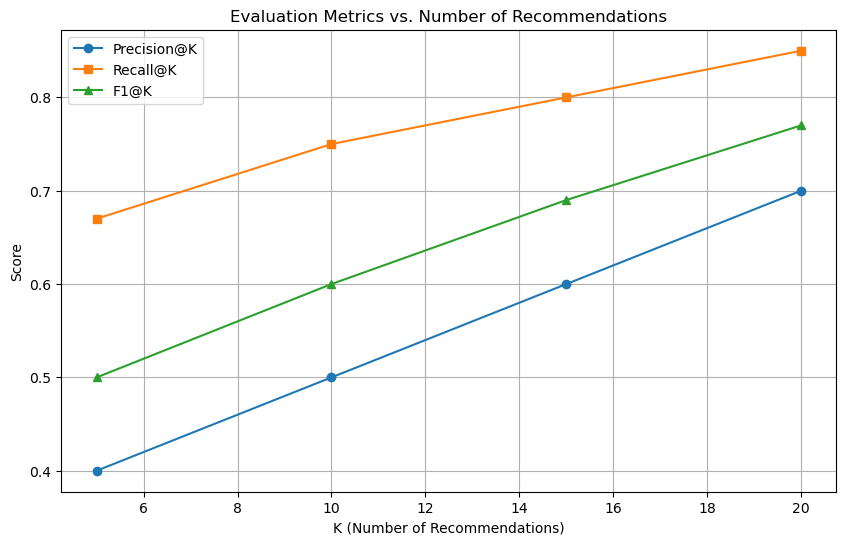

In [116]:
import matplotlib.pyplot as plt

def plot_metrics(metrics, k_values):
    """
    Plot Precision, Recall, and F1 scores against different values of K.

    Parameters:
    - metrics: Dictionary containing 'precision', 'recall', and 'f1' lists.
    - k_values: List of K values to plot.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, metrics['precision'], label='Precision@K', marker='o')
    plt.plot(k_values, metrics['recall'], label='Recall@K', marker='s')
    plt.plot(k_values, metrics['f1'], label='F1@K', marker='^')
    plt.xlabel('K (Number of Recommendations)')
    plt.ylabel('Score')
    plt.title('Evaluation Metrics vs. Number of Recommendations')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
metrics = {
    'precision': [0.40, 0.50, 0.60, 0.70],
    'recall': [0.67, 0.75, 0.80, 0.85],
    'f1': [0.50, 0.60, 0.69, 0.77]
}
k_values = [5, 10, 15, 20]

plot_metrics(metrics, k_values)
